<a href="https://colab.research.google.com/github/Mike-R-B-Lab/Sales_Forecast/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SuperKart Sales Prediction**

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different new products so that they can strategize their sales operation.To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of new products.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

## **Importing the necessary libraries and overview of the dataset**

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Data Overview**

In [3]:
kart = pd.read_csv("https://raw.githubusercontent.com/Mike-R-B-Lab/Sales_Forecast/refs/heads/main/SuperKart%20_data.csv")

In [124]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

In [5]:
data.head(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36
5,FD5680,12.03,Low Sugar,0.053,Snack Foods,113.64,OUT004,2009,Medium,Tier 2,Supermarket Type2,2629.15
6,FD5484,16.35,Low Sugar,0.112,Meat,185.71,OUT003,1999,Medium,Tier 1,Departmental Store,5081.14
7,NC5885,12.94,No Sugar,0.286,Household,194.75,OUT003,1999,Medium,Tier 1,Departmental Store,4494.62
8,FD1961,9.45,Low Sugar,0.047,Snack Foods,95.95,OUT002,1998,Small,Tier 3,Food Mart,1684.82
9,NC6657,8.94,No Sugar,0.045,Health and Hygiene,143.01,OUT004,2009,Medium,Tier 2,Supermarket Type2,2531.30


In [6]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 8763 rows and 12 columns.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [8]:
# Checking for missing values in the data
data.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


In [9]:
# Checking for duplicate values
data.duplicated().sum()

0

## **Exploratory Data Analysis**

In [10]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD6114,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- There are 16 different product types and fruits and vegetables have been sold the highest number of times (1249).
- There are 4 unique stores in the dataset.
- The revenue generated from the sale of a particular product varies from 33 to 8000 with 50% of the values lying above 2762.


In [11]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing the count of each unique value
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Product_Id
FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: count, Length: 8763, dtype: int64
--------------------------------------------------
Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64
--------------------------------------------------
Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64
--------------------------------------------------
Store_Id
OUT004    4676
O

**Observations:**
- We can observe that in the Product_Sugar_Content column, there are 3 types - Low Sugar, Regular, and reg. It seems that Regular and reg are referring to the same category. So let's replace reg with Regular.


In [125]:
# Replacing reg with Regular in Product_Sugar_Content feature
data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [126]:
# Counting every sugar content category
data.Product_Sugar_Content.value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


**Observation:**
- We can see that the Product_Id column has two characters followed by a number. Let's delve deeper and see whether they are having any relationship with the other columns or not.

In [127]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [15]:
# Viewing unicque product Ids
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [16]:
# Viewing unique Product types for the FD id
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

**Observation:**
- We can see that FD is being used in the Product_Id of the food items.

In [17]:
# Viewing unique Product types for the DR id
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

**Observation:**
- We can see that DR is being used in the Product_Id of the drinks.

In [18]:
# Viewing unique Product types for the NC id
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

**Observation:**
- We can see that NC is being used in the Product_Id of the other items found in the store.

**The Product_Id column will not add any value to our analysis so let's drop it before we move forward.**

In [128]:
# Dropping both the column
data = data.drop(["Product_Id"], axis = 1)

In [20]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


### **Univariate Analysis**

In [21]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)

    # Boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet")

    # For histogram : If no bins number input, 2nd histplot with auto. # bins
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2)

     # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")
    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color = "red", linestyle = "-")

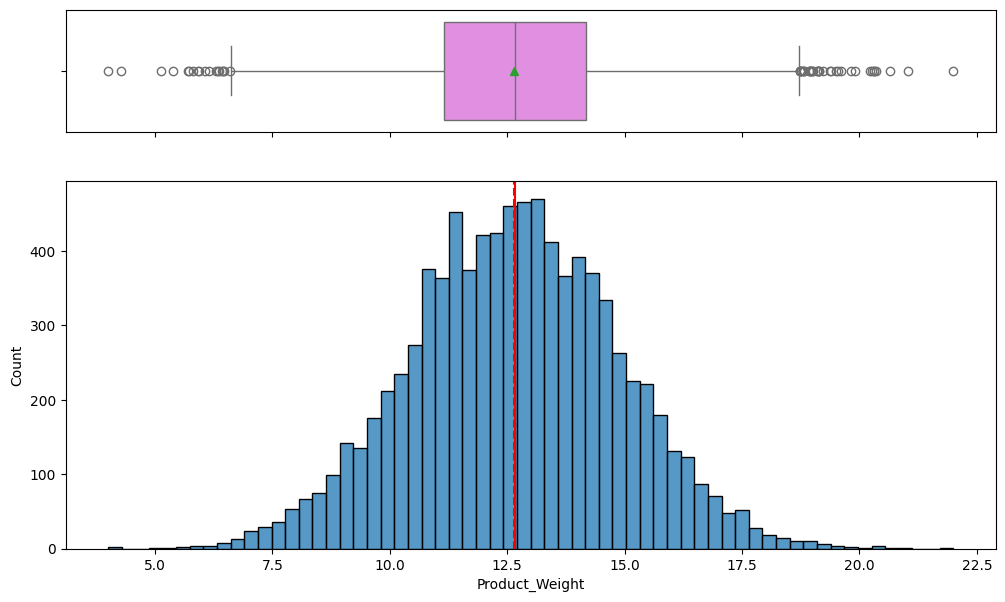

In [22]:
# Plotting product weight
histogram_boxplot(data, "Product_Weight")

**Observation:**
- The product weight is uniformly distributed with mean and median being around 12.5.

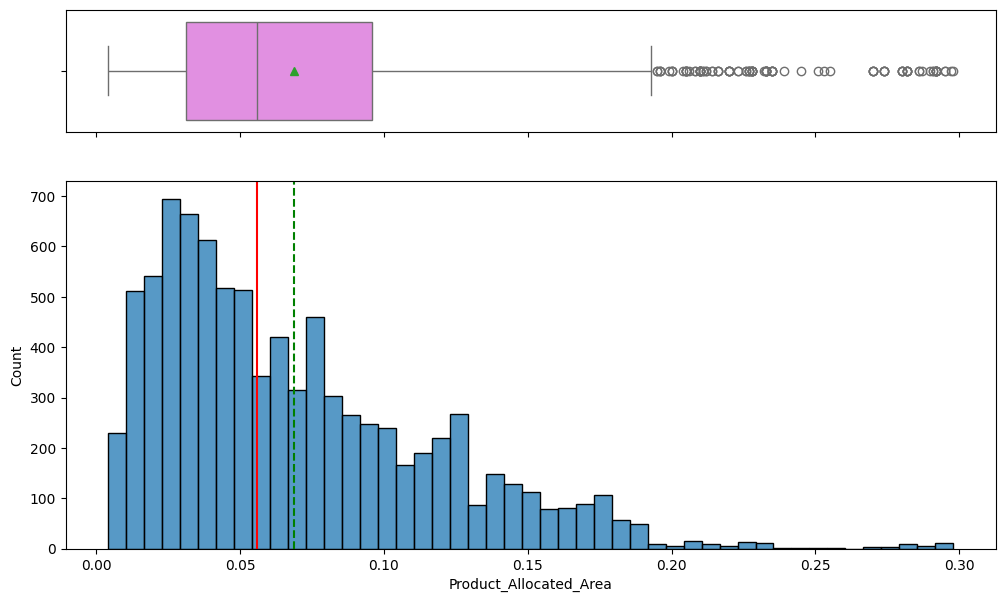

In [23]:
# Plotting product allocated area
histogram_boxplot(data, "Product_Allocated_Area")

**Observation:**
- The distribution is right skewed with the median being around 0.05.

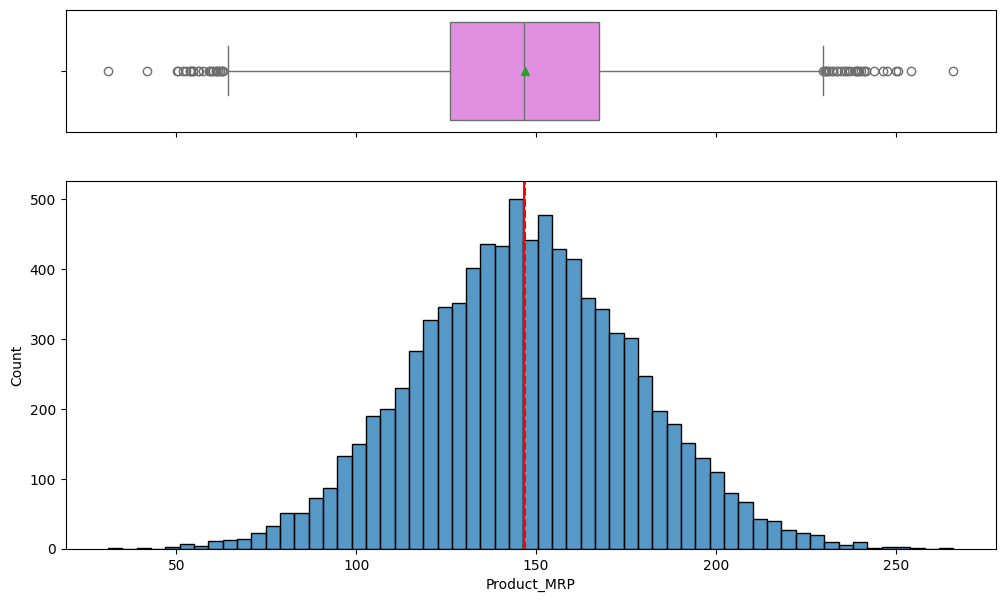

In [24]:
# Plotting product MRP
histogram_boxplot(data, "Product_MRP")

**Observation:**
- The product MRP is uniformly distributed with mean and median being around 150.

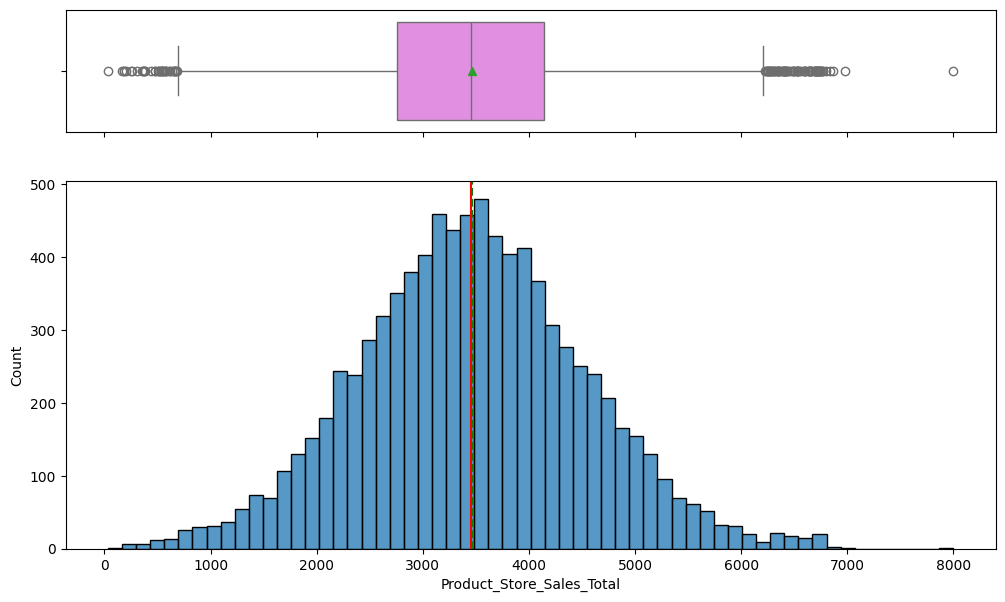

In [25]:
# Plotting product store sales total
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observation:**
- The revenue generated from each product at a particular store is normally distributed with mean and median being about 3500.

In [26]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()       # Unique objects in the column
    # Plot size depending on "n" input
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

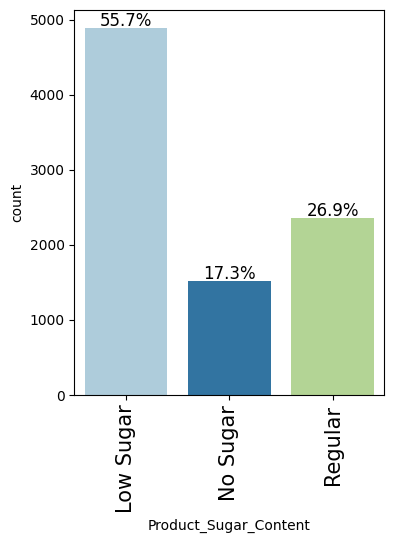

In [27]:
# Bar plotting sugar content
labeled_barplot(data, "Product_Sugar_Content", perc = True)

**Observations:**
- Around 56% of the products have low sugar followed by 27% products which have regular sugar content.
- Around 17% of the products have no sugar content.

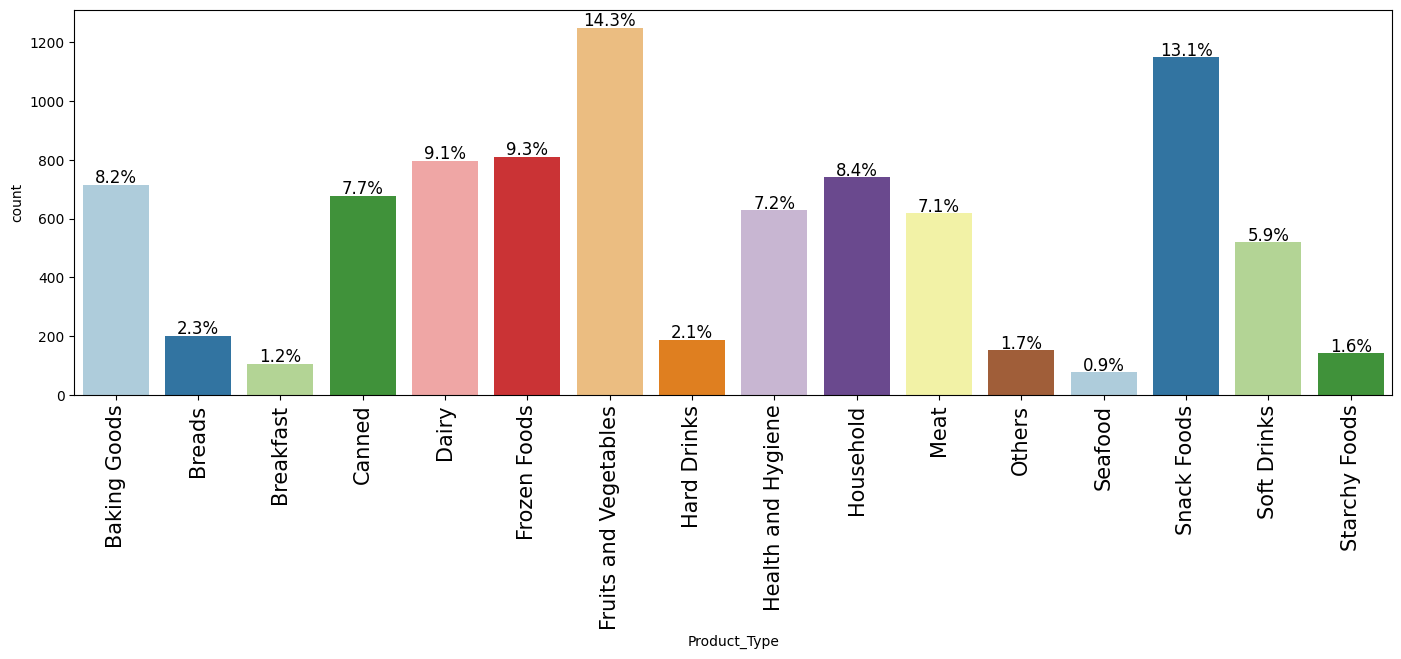

In [28]:
# Bar plotting Product type
labeled_barplot(data, "Product_Type", perc = True)

**Observations:**
- Fruits and vegetables (14%) and Snack Foods (13%) have been bought the highest amount of times from all the stores combined.
- Seafood (1%) has been bought the lowest amount of times.


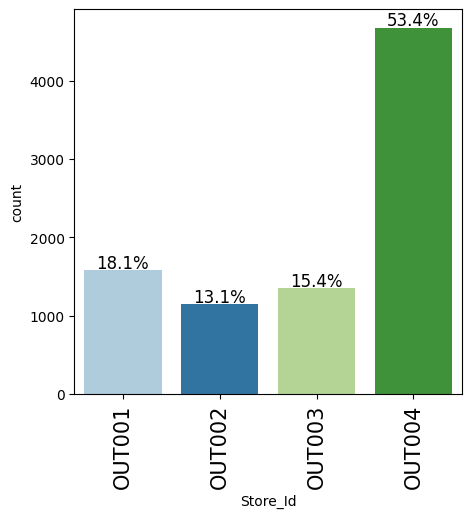

In [29]:
# Bar plotting store ids
labeled_barplot(data, "Store_Id", perc = True)

**Observations:**
- Around 53% of the products are being sold from outlet OUT004. An almost equal number of products have been sold from the other three stores combined.


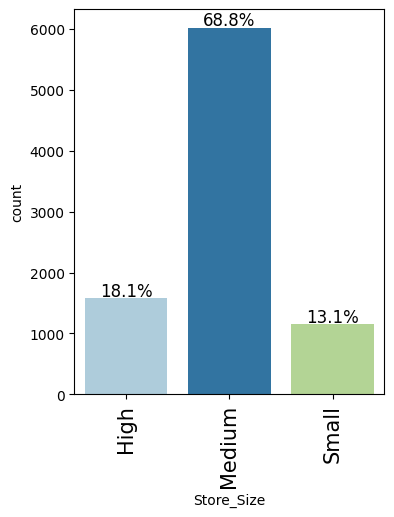

In [30]:
# Bar plotting store size
labeled_barplot(data, "Store_Size", perc = True)

**Observations:**
- Around 69% of the products have been sold from medium size stores
- Small stores sell the least amount of products

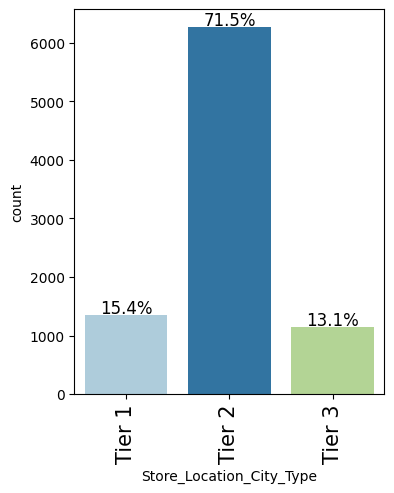

In [31]:
# Bar plotting city type
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:**
- Around 72% of the products have been sold from stores which are located in Tier 2 cities.
- Almost an equal amount of products have been sold from the stores located in Tier 1 and Tier 3 cities.

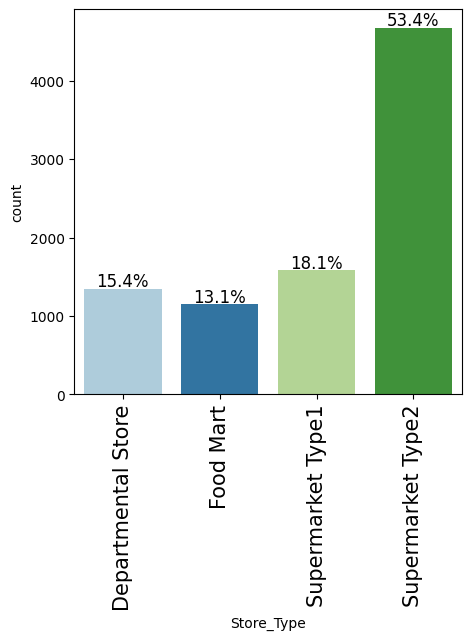

In [32]:
# Bar plotting store type
labeled_barplot(data, "Store_Type", perc = True)

**Observations:**
- Around 53% of the products have been sold from stores that are of Supermarket Type2.
- Almost an equal amount of products have been sold from Supermarket Type1, Food Mart and Departmental Store.

### **Bivariate Analysis**

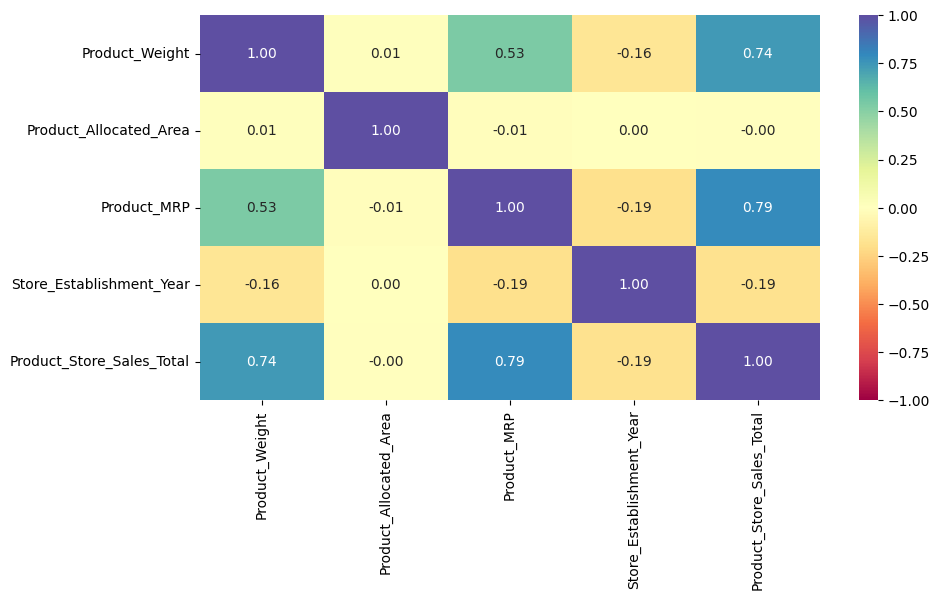

In [33]:
# Addind numerical colums to a list
cols_list = data.select_dtypes(include = np.number).columns.tolist()

#Plotting a heatmap of the correlation between each numerical column
plt.figure(figsize = (10, 5))
sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

**Observations:**
- Product weight and product MRP are highly correlated with Product_Store_Sales_Total.
- Product weight and product MRP are moderately correlated with each other.
- There is not much correlation among the rest of the variables.
- Store_Establishment_Year is negatively correlated with our target variable i.e Product_Store_Sales_Total.

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

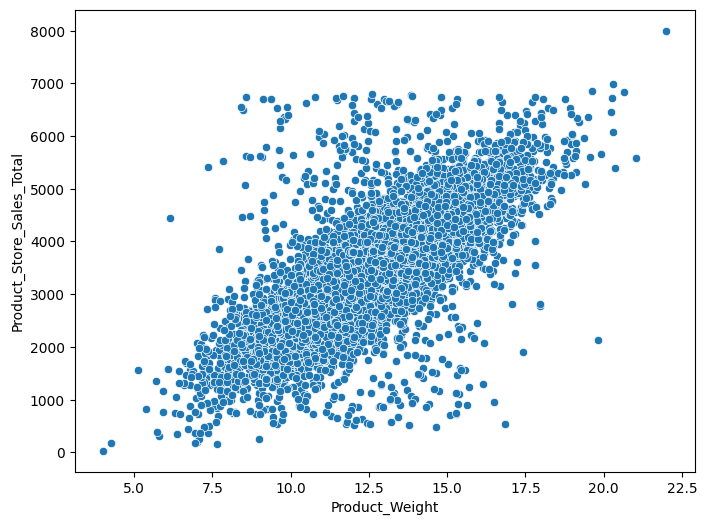

In [34]:
# Scatter plotting sales and product weight
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- Product_Weight and Product_Store_Sales_Total are almost linearly correlated with each other.  

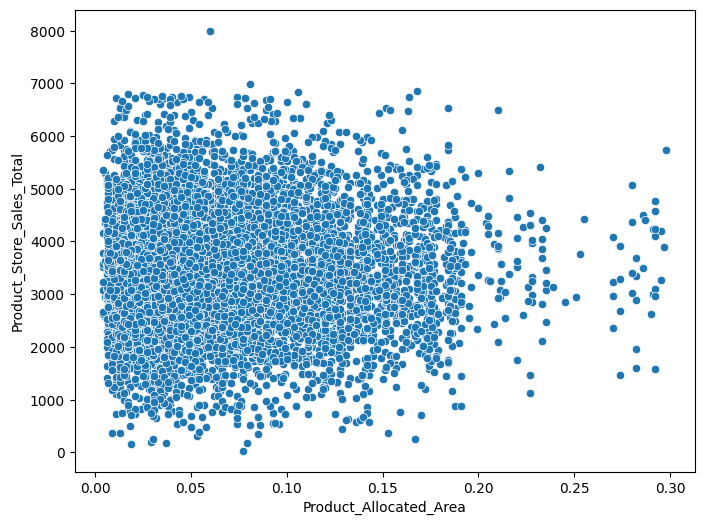

In [35]:
# Scatter plotting sales and product allocated area
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Allocated_Area, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- There seem to be no relationship between Product_Allocated_Area and Product_Store_Sales_Total.

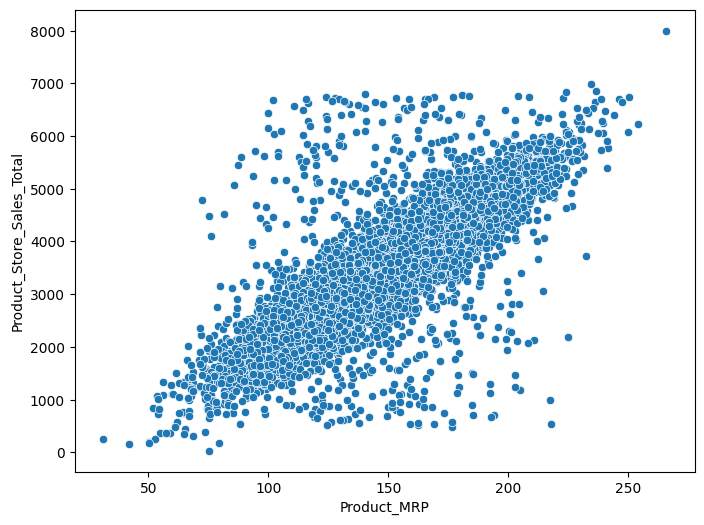

In [36]:
# Scatter plotting sales and product MRP
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_MRP, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- Product_MRP and Product_Store_Sales_Total are almost linearly correlated with each other.

**Let us see from which product type the company is generating most of the revenue**

In [37]:
# Finding the mean price for every type of product
df_avg_sales = data.groupby("Product_Type", as_index=False)["Product_Store_Sales_Total"].mean()

# Display the result
print(df_avg_sales)

             Product_Type  Product_Store_Sales_Total
0            Baking Goods                3425.958101
1                  Breads                3574.711200
2               Breakfast                3416.324623
3                  Canned                3397.463383
4                   Dairy                3532.560352
5            Frozen Foods                3464.834562
6   Fruits and Vegetables                3443.421353
7             Hard Drinks                3364.594731
8      Health and Hygiene                3445.393646
9               Household                3465.865095
10                   Meat                3445.326764
11                 Others                3586.068212
12                Seafood                3584.263684
13            Snack Foods                3471.711880
14            Soft Drinks                3462.513911
15          Starchy Foods                3679.251418


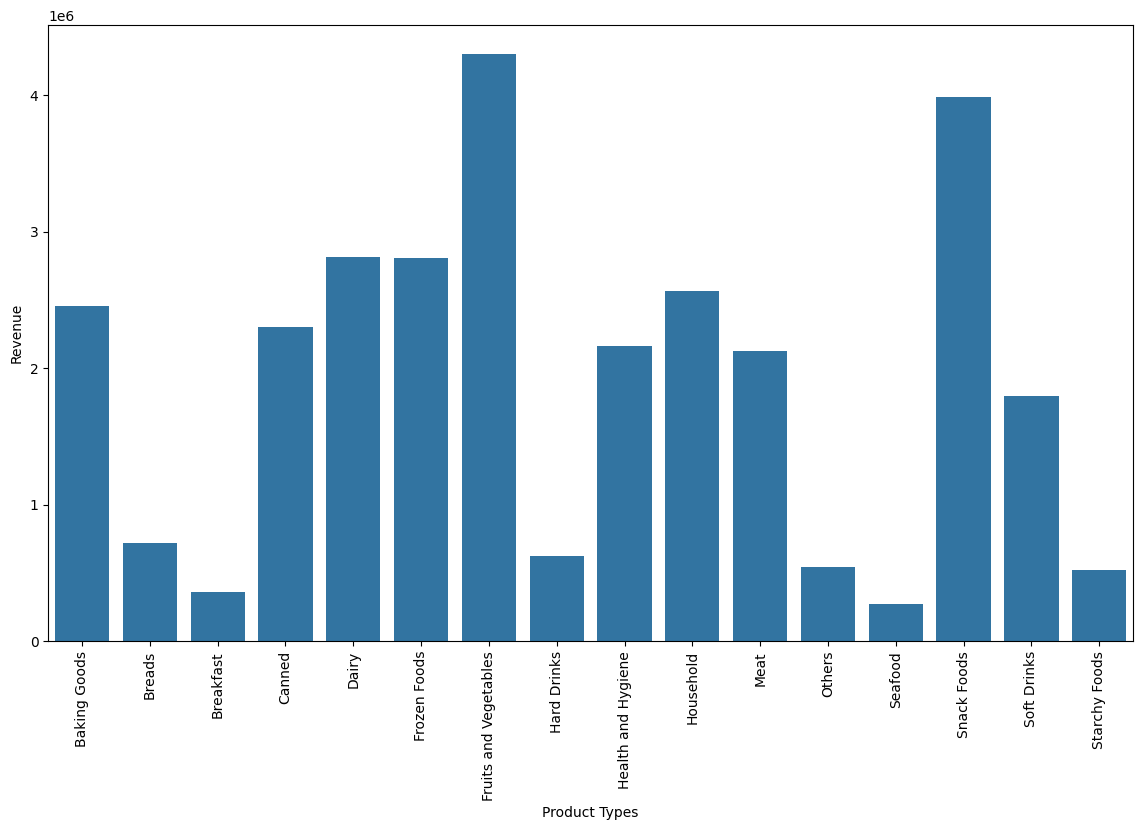

In [38]:
# Creating df grouped by product type with total amount of store sales
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

# Bar plotting sales per product
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

**Observations:**
- Fruits and vegetables and snack foods are the biggest contributors to the revenue of the company.
- Seafood is the lowest contributor to the revenue of the company.
- Dairy and Frozen foods are contributing almost the same to the revenue of the company.

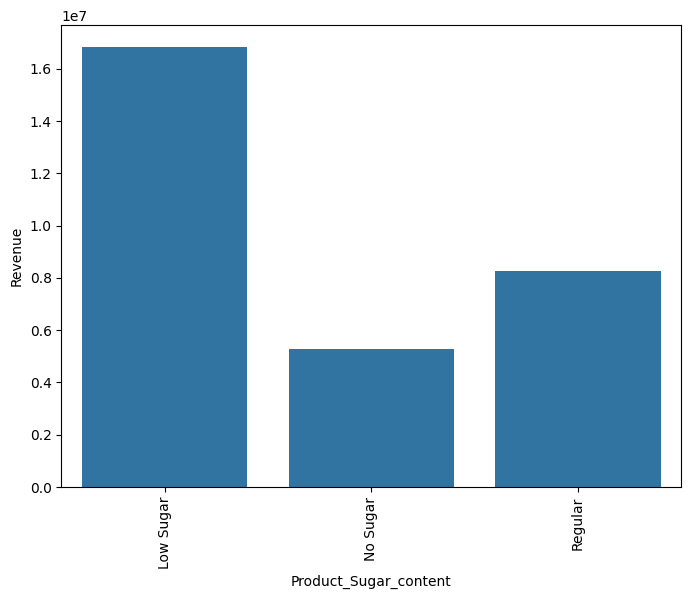

In [39]:
# Creating df grouped by sugar content with total amount of store sales
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

# Bar plotting the results
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
b = sns.barplot(
    x = df_revenue2.Product_Sugar_Content, y = df_revenue2.Product_Store_Sales_Total
)
b.set_xlabel("Product_Sugar_content")
b.set_ylabel("Revenue")
plt.show()

**Observations:**
- Low sugar content materials are the biggest contributors to the revenue of the company(SuperKart).
- No Sugar content materials are the lowest contributors to the revenue of the company(SuperKart).

**Let us see from which type of stores and locations the revenue generation is more**.

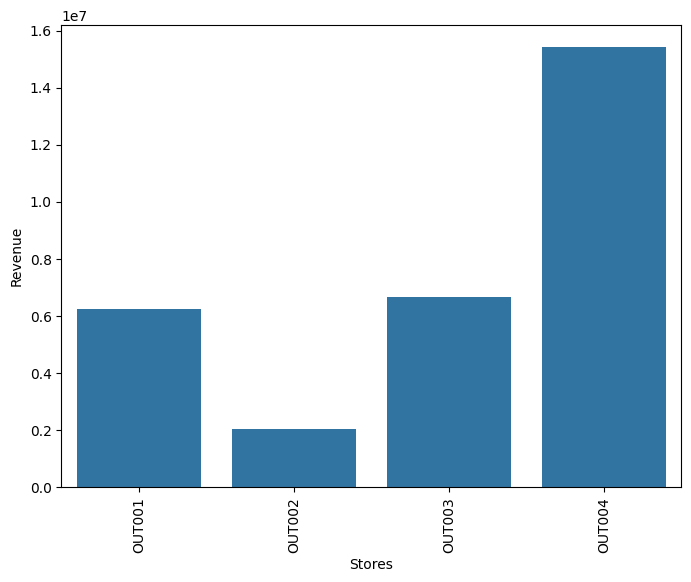

In [40]:
# Creating df grouped by Store Id with total amount of store sales
df_store_revenue = data.groupby(["Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

# Plotting the result
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
r = sns.barplot(
    x = df_store_revenue.Store_Id, y = df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()

**Observations:**
- OUTOO4 is contributing the most to the revenue of the company which is more than double the contribution being made by second-placed store OUT003.
- OUT002 is contributing the least to the revenue of the company with two times less sales than OUT001 and OUT003.

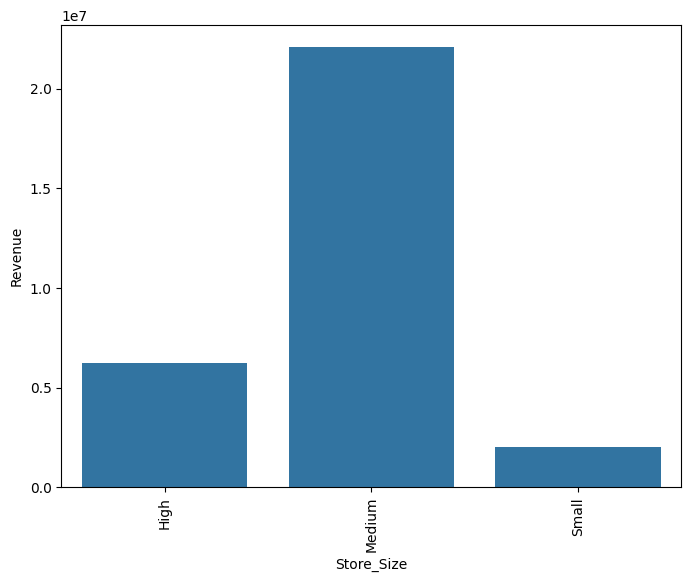

In [41]:
# Creating df grouped by Store size with total amount of store sales
df_revenue3 = data.groupby(["Store_Size"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

# Plotting the result
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
c = sns.barplot(x = df_revenue3.Store_Size, y = df_revenue3.Product_Store_Sales_Total)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()

**Observations:**
- The medium-sized stores are contributing heavily to the revenue.
- The high-sized stores are contributing the least to the revenue.

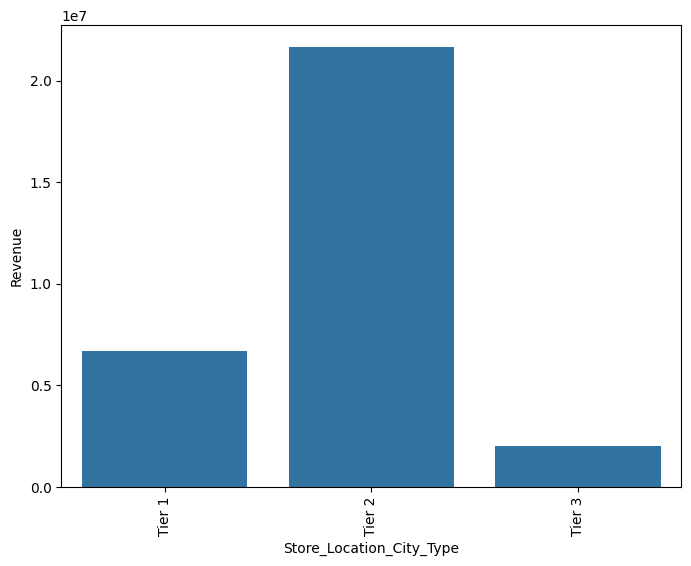

In [42]:
# Creating df grouped by Store location type with total amount of store sales
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

# Plotting the result
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
d = sns.barplot(
    x = df_revenue4.Store_Location_City_Type, y = df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

**Observations:**
- Stores in the Tier 2 cities are contributing the most to the revenue of SuperKart.
- Stores in the Tier 3 cities are contributing the least to the revenue of SuperKart.

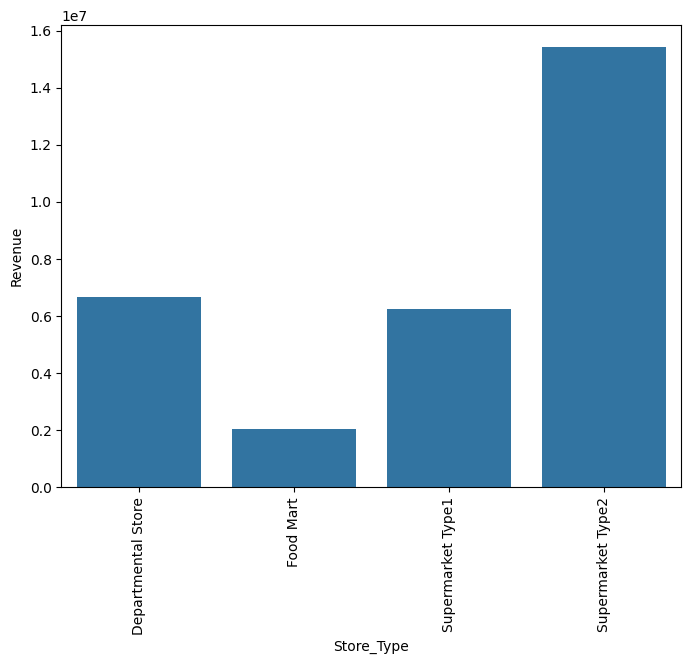

In [43]:
# Creating df grouped by store type with total amount of store sales
df_revenue5 = data.groupby(["Store_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

# Plotting the result
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
e = sns.barplot(x=df_revenue5.Store_Type, y = df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

**Observations:**
- Stores of Supermarket Type 2 are performing exceptionally well.
- Stores of SuperKart Type 1 and Departmental Store are almost contributing the same revenue to the company.

**Let's check the distribution of Product_Store_Sales_Total with the other categorical columns**

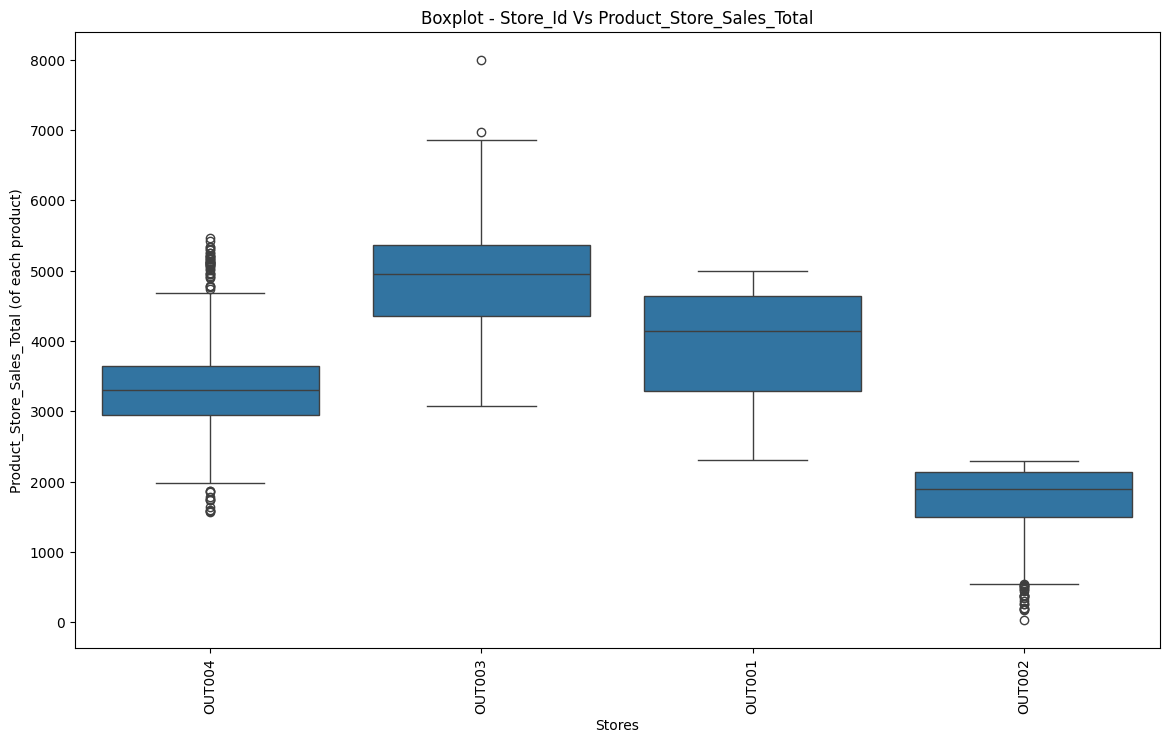

In [44]:
# Box plotting product sales with store id to see the where pricey goods are sold
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Store_Id, y = data.Product_Store_Sales_Total)
plt.xticks(rotation = 90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Observations:**
- Although the number of products bought from OUT003 is around 15%, more costly goods have been bought from this store than the other stores. This shows that this is a premium store for the company.
- The low cost goods have been bought more from OUT002 than the other stores. This store has less contribution to the company.

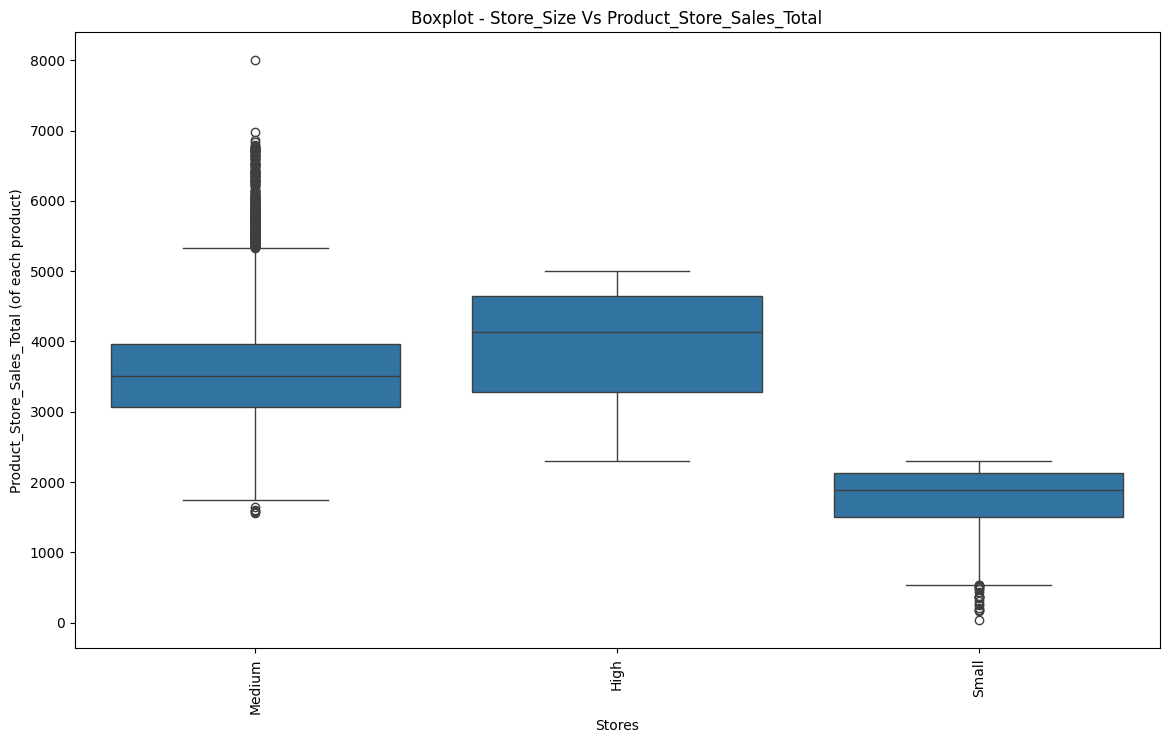

In [45]:
# Box plotting product sales with store size to see the where pricey goods are sold
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Store_Size, y = data.Product_Store_Sales_Total)
plt.xticks(rotation = 90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Observation:**
- More costly goods have been bought from the stores which are high in size which seems to be quite logical.

## **Data Preprocessing**

### **Feature Engineering**

**A store that has been in the business for a long duration is more trustworthy than the newly established one. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let's calculate the current age of the store and incorporate that into our model.**

In [129]:
# Creating a new colummn with store age
data["Store_Age_Years"] = 2022 - data.Store_Establishment_Year

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [47]:
# Creating the list of types of objects that are perishable
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [130]:
# Adding product type category column and making item persihable if in list and not perishable if not
data['Product_Type_Category'] = data['Product_Type'].apply(lambda x: 'Perishable' if x in perishables else 'Not Perishable')

In [131]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,13,Not Perishable
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,23,Perishable
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,35,Not Perishable
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,35,Not Perishable
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,24,Not Perishable


### **Outlier Check**

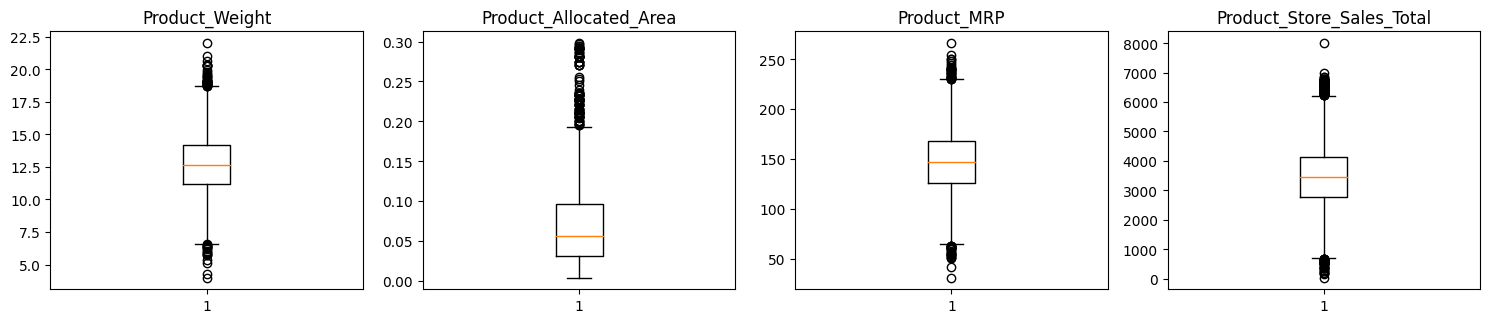

In [132]:
# Creating list of numerical columns and removing establishment year and store age
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

# Plotting boxplots for each numeric column
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- There are quite a few outliers in the data. But there are less residuals with them than without them. We will keep them.

In [133]:
# Removing Product store sales
numeric_columns.remove("Product_Store_Sales_Total")

In [95]:
#for i in numeric_columns :
 #   q1 = data[i].quantile(0.25)
  #  q3 = data[i].quantile(0.75)
   # iqr = q3 - q1
    #data = data[(data[i] >= q1 - 1.5 * iqr) & (data[i] <= q3 + 1.5 * iqr)]

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total.
- Before we build a model, we'll have to encode categorical features and drop the unnecessary columns. We'll drop Product_Type as we replaced it them with Perishables and non perishables, we'll drop Store_id as a possible new store will have a new id and we'll drop Store_Establishment_Year as we have Store_Age_Years (which is easier to model with).
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [134]:
# Dropping columns
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [135]:
data1 = data.copy

In [143]:
# Creating dummy values (categorical into numerical)
data1 = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [144]:
data1.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age_Years,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Id_char_FD,Product_Id_char_NC,Product_Type_Category_Perishable
0,12.66,0.027,117.08,2842.40,13,False,False,True,False,True,False,False,False,True,True,False,False
1,16.54,0.144,171.43,4830.02,23,False,False,True,False,False,False,False,False,False,True,False,True
2,14.28,0.031,162.08,4130.16,35,False,True,False,False,True,False,False,True,False,True,False,False
3,12.10,0.112,186.31,4132.18,35,False,False,False,False,True,False,False,True,False,True,False,False
4,9.57,0.010,123.67,2279.36,24,True,False,False,True,False,True,True,False,False,False,True,False


In [155]:
# Separating features and the target column
X = data1.drop(["Product_Store_Sales_Total"], axis = 1)
y = data1["Product_Store_Sales_Total"]

In [156]:
# Adding an intercept term to facilitate the linear regression model creation
X = sm.add_constant(X)

In [157]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 or inf (unless dummy variables) will be dropped/treated till all the features have a VIF score < 5

In [158]:
# Transforming data type to float to assure consistency in data
X_train1 = X_train.astype(float)
y_train1 = y_train.astype(float)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train1))

                             feature       VIF
0                              const  0.000000
1                     Product_Weight  1.752928
2             Product_Allocated_Area  1.001184
3                        Product_MRP  1.885058
4                    Store_Age_Years       inf
5     Product_Sugar_Content_No Sugar       inf
6      Product_Sugar_Content_Regular  1.088506
7                  Store_Size_Medium       inf
8                   Store_Size_Small       inf
9    Store_Location_City_Type_Tier 2       inf
10   Store_Location_City_Type_Tier 3       inf
11              Store_Type_Food Mart       inf
12      Store_Type_Supermarket Type1       inf
13      Store_Type_Supermarket Type2       inf
14                Product_Id_char_FD  2.774371
15                Product_Id_char_NC       inf
16  Product_Type_Category_Perishable  1.217690


**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are low enough to be kept.
- The VIF for dummy variables can be ignored which is expected that they would have inf VIF.
- But the continuous variables should not have high VIF : we will drop Store_Age_Years as it has inf multicollinearity

In [159]:
# Dropping store age column
X_train1 = X_train1.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train1))

                             feature       VIF
0                              const  0.000000
1                     Product_Weight  1.752928
2             Product_Allocated_Area  1.001184
3                        Product_MRP  1.885058
4     Product_Sugar_Content_No Sugar       inf
5      Product_Sugar_Content_Regular  1.088506
6                  Store_Size_Medium       inf
7                   Store_Size_Small       inf
8    Store_Location_City_Type_Tier 2       inf
9    Store_Location_City_Type_Tier 3       inf
10              Store_Type_Food Mart       inf
11      Store_Type_Supermarket Type1       inf
12      Store_Type_Supermarket Type2       inf
13                Product_Id_char_FD  2.774371
14                Product_Id_char_NC       inf
15  Product_Type_Category_Perishable  1.217690


## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly.

In [161]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],

                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [162]:
# Create the model
model1 = sm.OLS(y_train1, X_train1).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     2860.
Date:                       Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                               21:29:21   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6123   BIC:                         9.236e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              176.6077     42.659      4.140      0.000      92.982     260.234
Product_Weight                     135.0943      3.436     39.318      0.000     128.359     141.830
Product_Allocated_Area            -139.5679    118.876     -1.174      0.240    -372.608      93.472
Product_MRP                         12.8696      0.254     50.702      0.000      12.372      13.367
Product_Sugar_Content_No Sugar      16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Sugar_Content_Regular       30.8608     13.284      2.323      0.020       4.819      56.902
Store_Size_Medium                  394.3947     26.547     14.856      0.000     342.353     446.436
Store_Size_Small                  -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Location_City_Type_Tier 2   -308.1516      8.855    -34.801      0.000    -325.510    -290.794
Store_Location_City_Type_Tier 3   -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Food Mart              -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Supermarket Type1       165.3861     17.762      9.311      0.000     130.566     200.206
Store_Type_Supermarket Type2      -473.5378     17.176    -27.570      0.000    -507.208    -439.867
Product_Id_char_FD                   0.3932     21.936      0.018      0.986     -42.609      43.396
Product_Id_char_NC                  16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Type_Category_Perishable     7.7111     13.233      0.583      0.560     -18.231      33.653
==============================================================================
Omnibus:                     1745.262   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46497.082
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.399   Cond. No.                     6.25e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [163]:
# Checking model1 performance
model_pref(model1, X_train1, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observations:**
- The Train and the Test scores are very close to each other so we can say the model is not overfitting.
- However, the Test score is slightly better than the Train score. So, we might be able to get better performance if we increase the complexity of the model.

###  **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [164]:
# Dropping columns with low p-values. If categorical column, dropping all related columns
# (the resulting categorical columns would have high p-values if weren't removed)
X_train1 = X_train1.drop(["Product_Type_Category_Perishable", "Product_Id_char_FD", "Product_Id_char_NC",
                          "Product_Allocated_Area", "Product_Sugar_Content_No Sugar", "Product_Sugar_Content_Regular"], axis = 1)


In [165]:
X_test1 = X_test.drop(["Product_Type_Category_Perishable", "Product_Id_char_FD", "Product_Id_char_NC",
                          "Product_Allocated_Area","Product_Sugar_Content_No Sugar", "Product_Sugar_Content_Regular"], axis = 1)

In [166]:
X_train1 = X_train1.astype(float)
y_train1 = y_train.astype(float)

# Create the model
model2 = sm.OLS(y_train, X_train1).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.823
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     5715.
Date:                       Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                               21:29:37   Log-Likelihood:                -46137.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6128   BIC:                         9.233e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             182.7885     40.448      4.519      0.000     103.496     262.081
Product_Weight                    134.9619      3.436     39.277      0.000     128.226     141.698
Product_MRP                        12.8720      0.254     50.718      0.000      12.374      13.370
Store_Size_Medium                 397.3998     25.645     15.496      0.000     347.126     447.674
Store_Size_Small                 -382.5177      5.294    -72.252      0.000    -392.896    -372.139
Store_Location_City_Type_Tier 2  -307.2688      8.560    -35.896      0.000    -324.049    -290.488
Store_Location_City_Type_Tier 3  -382.5177      5.294    -72.252      0.000    -392.896    -372.139
Store_Type_Food Mart             -382.5177      5.294    -72.252      0.000    -392.896    -372.139
Store_Type_Supermarket Type1      167.9064     17.213      9.755      0.000     134.163     201.650
Store_Type_Supermarket Type2     -475.1752     17.046    -27.876      0.000    -508.591    -441.760
==============================================================================
Omnibus:                     1744.545   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46713.718
Skew:                           0.773   Prob(JB):                         0.00
Kurtosis:                      16.431   Cond. No.                     1.12e+35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [167]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  446.982376  262.201036  0.785561
1   Test  446.686705  266.516566  0.790154


**Observations:**
- The train and the test scores are very close to each other. So, we can say the model is not overfitting.
- Model1 and model2 are performing at the same efficiency.
- 79% of the variance in the store sales are explained by the model

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [168]:
residuals = model2.resid

np.mean(residuals)

1.0794133402195823e-13

**Observation:**

- The mean of residuals is very close to 0, meaning that the average difference between the actual store sales and the predicted store sales throughout the entire dataset is 0.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [170]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [171]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 0.9849257302869845), ('p-value', 0.6628085660215166)]

**Observation:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

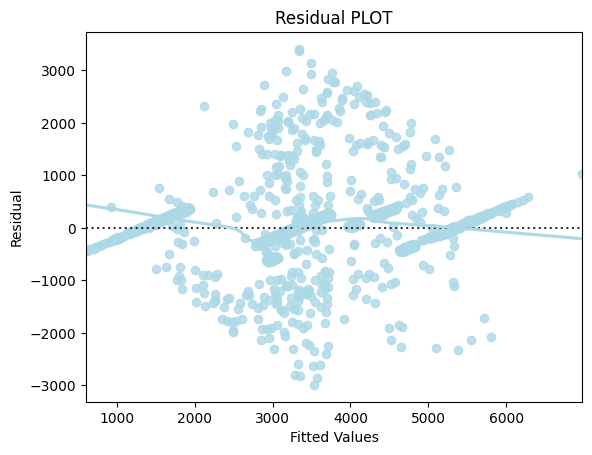

In [173]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observation:**

- There is no obvious pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

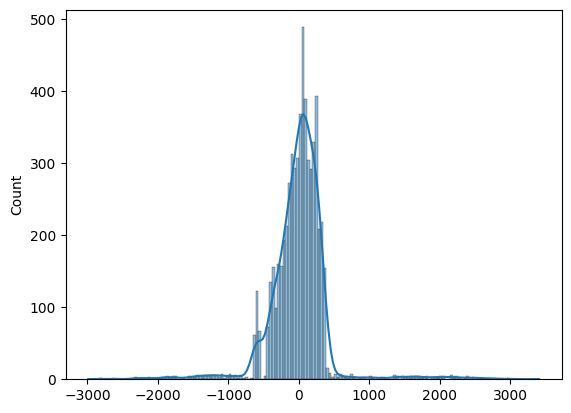

In [174]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

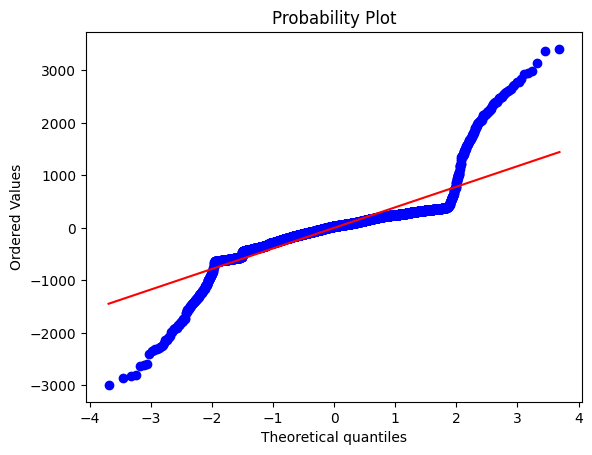

In [175]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observation:**

- From the above plots, the residuals seem to follow a normal distribution except for the extreme quantiles.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

In [176]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200712.689 (+/- 64085.512)


**Observation:**
- After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

In [179]:
# Creating a fake product with variables to predict the store sales
# Constant is 1
const = 1
# weight
w = 10
# MRP
mrp = 175
# Store size
Medium = True
Small = False
# Store location
Tier2 = True
Tier3 = False
# Store type
FoodMart = True
SuperKart1 = False
SuperKart2 = False

product_inputs = np.array([const, w, mrp, Medium, Small, Tier2, Tier3, FoodMart, SuperKart1, SuperKart2])

In [187]:
# Predicting total store sales for a product with the previous
predicted_value = model2.predict(product_inputs)
print(f'The product with the determined characteristics would have ${predicted_value[0]:,.2f} in sales')

The product with the determined characteristics would have $3,492.62 in sales


## **Actionable Insights and Business Recommendations**

- We can use this prediction model to predict the total sales that will be done by a SuperKart product in the next quarter (if quater sells have similar trends).

- The model explains around 79% of the variation in the data.


**Additional information that can be collected to gain better insights -**

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to it.

- If the company had provided data throughout the past years, we could have estimated the sells more precisely according to the quarter.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their sells accordingly.

